# Определение потенциально популярных компьютерных игр   <a class="tocSkip">

**Цель исследования:**  
 Проанализировать данные о продажах игр и выявить определяющие успешность игры закономерности. Сделать вывод о том, какие игры будут потенциально популярны в следующем году с целью планирования реклаламных компаний магазином компьютерных игр "Стримчик".  

## Изучение данных из файла

In [ ]:
# импорт библиотек
!pip install seaborn -U
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from math import factorial
from scipy import stats as st
import seaborn as sns
import warnings

In [2]:
# чтение файлов
data_games = pd.read_csv('/datasets/games.csv') 

In [3]:
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Рассмотрев таблицу **data_games** видим, что каждая строка таблицы содержит информацию о продажах, рейтинге и жанрах игр:  
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. 

Посмотрим на общую информацию о таблице:

In [4]:
data_games.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data_games.describe() 

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


 Всего представлены данные о продажах 16715 игр, вышедших с 1980 по 2016 годы на разных платформах. Рассмотрим проблемы в данных и способы их решения:

|Столбец |Обзор |Предобработка |Возможные причины |Примечание |
|:-------|:-----|:-------------|:-----------------|:----------| 
|Все названия столбцов  |Записаны в разных регистрах | Привести названия к нижнему регистру  |- |- |
|Year_of_Release |Тип float |Привести к целочисленному типу |- |- |
|NA_sales, EU_sales, JP_sales, Other_sales  |Тип float |- |- |Данные о продажах уже указаны в млн. и если привести их к целочисленному типу, то десятичные значения будут либо отброшены, либо округлены. Так как данные о продажах разбиты по 4 регионам, то при подсчете глобальных продаж из-за округлений итоговый результат может быть искажен до 2 млн. Чтобы избежать таких искажений, оставим данные о продажах с десятичными значениями. |
|User_Score |Тип object |Привести к типу float |Вероятно в этом столбце есть строковые значения. |С таким типом мы не сможем корректно работать с числовыми значениями. Необходимо привести данные к типу float. Не будем приводить данные к целочисленному типу, так как оценки выставляются всего по 10 шкале и, например, оценка 7.5 отличается от оценки 7 или 8. |
|Critic_Score |Тип float |Привести к целочисленному типу |- |Оценки критиков выставляются по 100 бальной шкале в целых единицах, нет  необходимости в данных с десятичными значениями. |
|Name, Genre |По 2 строки с пропущенными значениями |Проверить, если эти строки совпадают и в таком случае нет возможности по имени игры восстановить ее жанр, то необходимо удалить эти 2 строки. |Технические ошибки |- |
|Year_of_Release |269 попущенных значений |- |Технические ошибки |Заменить такие пропуски подходящими значением невозможно, так как даже одна и также игра может выходить на разных платформах в разные годы. |
|Critic_Score, User_Score |от 40% до 52% попущенных значений |- |Вероятно на сайте, с которого была получена информация, не набралось еще достаточное количество оценок для выставления общего рейтинга. |Мы не сможем заполнить пропуски каким-либо подходящим значением. Удалять строки с пропущенной информацией также нельзя, иначе мы потеряем большое количество необходимой информации.|
|Rating |40% пропущенных значений |Пропуски заполним значением "undefined" (англ. - "неопределенный") |Причин отсутствия данных может быть несколько. Например, организация ESRB существует с 1994 года и вероятно игры вышедшие до 1994 не получали рейтинг от ESRB. Другой пример: организация ESRB выставляет рейтинг в США и Канаде, в европейский странах и в Японии существуют свои рейтинговые организации и игры, вышедшие в этих странах могут не получить рейтинг от организации ESRB. |- |

### Вывод
Прежде, чем проводить дальнейший анализ данных необходима следующая предобработка данных:
1. Замена названий столбцов.
2. Приведение к нужным типам данных.
3. Обработка пропусков.
4. Добавление столбца с глобальными продажами.

## Предобработка данных

### Замена названий столбцов

Приведем названия столбцов таблицы к нижнему регистру:

In [6]:
data_games.columns = data_games.columns.str.lower()

### Вывод 
Теперь названия всех столбцов единообразны и записаные в едином регистре.

### Замена типа данных

- Столбцы **year_of_release** и **critic_score**   
  
Столбецы с годом релиза игры и оценками критиков имееют тип float, для удобства и точности последующей работы с данными приведем их целочисленному типу.

In [8]:
data_games = data_games.astype({'year_of_release': pd.Int64Dtype(), 'critic_score': pd.Int64Dtype()}) 

- Столбец **user_score**

Столбец с оценками пользователей имеет тип данных object. Вероятно, в нем кроме числовых и пропущенных значений содержатся строковые значения. Посмотрим на список уникальных значений в столбце:

In [9]:
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Действительно мы видим значение "*tbd*" (с английского вероятно To Be Determined - Будет определено). Обычно означает, что оценка игре присуждается тогда, когда на нее поступит определенное минимальное количество отзывов или оценок от пользователей. Таким образом данная аббревиатура не несет для нас никакой ценной информации. Для приведения данных к типу float, заменим ее на отсутствующее значение.

In [10]:
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce')

In [11]:
# проверка
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


### Вывод
Мы привели данные в столбцах **year_of_release** и **critic_score** к типу int, а данные столбце **user_score** теперь имеют тип float, что соответствует необходимым нам типам данных. 

### Обработка попусков

Проверим наше предположение на счет того, что пропуски в названиях и жанрах игр в одних и тех же строках.

In [12]:
data_games.query('name.isna() and genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Действительно, наше предположение подтвердилось. Название игры для нашего исследования не важно, а вот жанр имеет значение и поскольку мы не можем восстановить жанр игры по ее названию, то удалим эти 2 строки.

In [13]:
data_games.dropna(subset=['name'], inplace=True)

Заполним пропуски в столбце **rating** значениями "undefined".

In [14]:
data_games['rating'] = data_games['rating'].fillna('undefined')

### Вывод
Мы удалили 2 строки и избавились от пропусков в столбцах с именем и жанром игр.

### Добавление данных в таблицу

Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец.  

In [15]:
data_games['global_sales'] = data_games.loc[:, 'na_sales': 'other_sales'].sum(axis=1)

In [16]:
# проверка
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


### Вывод
Мы добавили в таблицу данные с глобальными продажами игр.

## Исследовательский анализ данных

### Количество игр, выпущенных в разные годы

Изучим какое количество игр выпускалось в разные годы. Результат отразим на диаграмме.

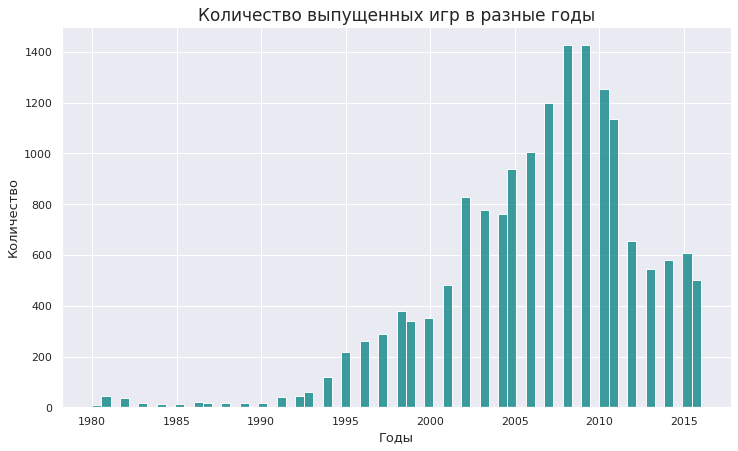

In [17]:
# гистограмма количества выпущенных игр в разные годы
sns.set(style="darkgrid")
plt.subplots(figsize=(12, 7))
sns.histplot(data_games['year_of_release'], color='teal', kde=False)
plt.xlabel('Годы', fontsize = 13)
plt.ylabel('Количество', fontsize = 13)
plt.title('Количество выпущенных игр в разные годы', fontsize = 17)
plt.show()    

В период с 1980 по 1993 гг. выпускалось очень небольшое количество игр по сравнению с более поздними годами. Очевидно индустрия компьютерных игр только начинала развиваться. Таким образом данные этого периода не будут полезны для дальнейшего анализа.  
Резкий рост можно наблюдать в 2002 году, а пик игровой индустрии пришелся на 2005 - 2011 годы. После чего в 2012 году наблюдался резкий спад, почти в 2 раза. В период с 2012 по 2016 годы уже не наблюдалось резких изменений и количество выпущенных игр в 2015 году практически соответствовало уровню 2012 года.

### Вывод

Индустрия компьютерных игр активно развивается с 1994 года. Резкий рост произошел в 2002 году, а пик пришелся на 2005 - 2011 годы. После чего в 2012 году наблюдался резкий спад и позже, вплоть по 2016 год, уже не наблюдалось резких изменений.

###  Как меняются продажи игр по платформам с течением времени

- **Изучим, как менялись продажи игр по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.** 

Выберем 10 платформ с наибольшими суммарными продажами.

In [18]:
top10_platforms = data_games.groupby(by='platform')['global_sales'].sum().sort_values(ascending=False).head(10)
top10_platforms

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: global_sales, dtype: float64

Лидирует платформа PS2 - 1255.77 млн. проданных копий игр, следом лидируют платформы X360, PS3 и Wii с количеством проданных копий от 971 до 907 млн. И замыкает десятку платформа PC - 259 млн. проданных копий игр.

Возьмем топ 10 платформ и посмотрим на распределение по годам, начиная с 1994 года.

In [19]:
# список названий 10 платформ с наибольшими продаажми с 1994 г.
name_top10_platfoms = top10_platforms.index

In [20]:
top10_platform_by_years = data_games.query('platform in @name_top10_platfoms and year_of_release >= 1994').pivot_table(index='year_of_release', columns='platform', values='global_sales', aggfunc='sum')
top10_platform_by_years.style.set_caption('Топ 10 платформ по продажам игр начиная с 1994 года')

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1994,nan,nan,12.87,6.03,nan,nan,nan,nan,nan,nan
1995,nan,nan,4.22,35.96,nan,nan,nan,nan,nan,nan
1996,nan,nan,10.58,94.7,nan,nan,nan,nan,nan,nan
1997,nan,nan,11.27,136.17,nan,nan,nan,nan,nan,nan
1998,nan,nan,3.26,169.49,nan,nan,nan,nan,nan,nan
1999,nan,nan,4.74,144.53,nan,nan,nan,nan,nan,nan
2000,nan,0.07,4.66,96.37,39.17,nan,nan,nan,nan,nan
2001,nan,61.53,5.47,35.59,166.43,nan,nan,nan,nan,nan
2002,nan,74.16,8.57,6.67,205.38,nan,nan,nan,nan,nan


Для наглядного отражения построим диаграмму распределения суммарных продаж для топ 10 платформ по годам.

Text(0, 0.5, 'Количество проданных копий')

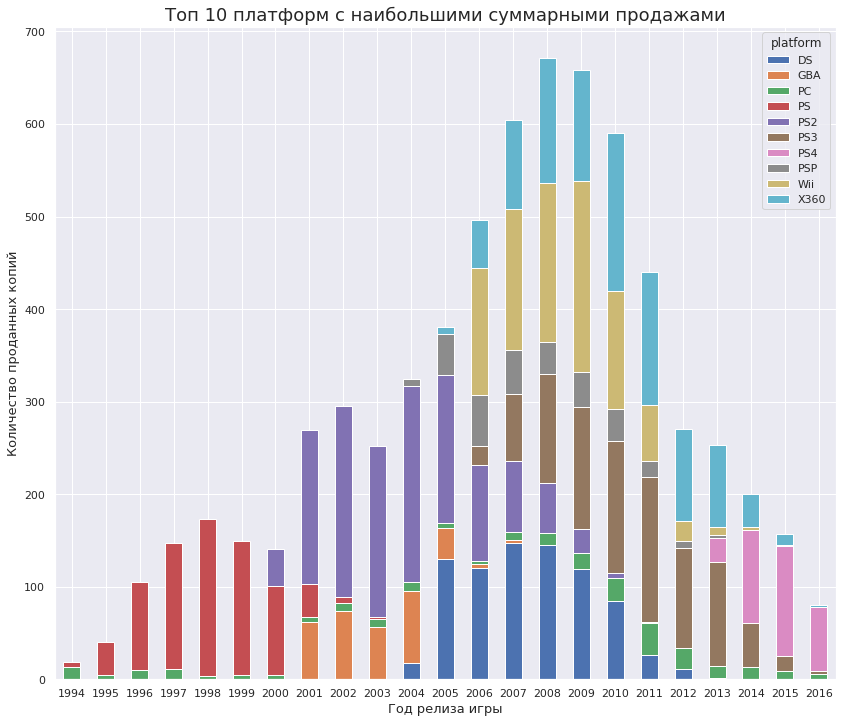

In [21]:
top10_platform_by_years.plot(kind='bar', stacked=True, rot=0, figsize=(14, 12))
plt.title('Топ 10 платформ с наибольшими суммарными продажами', fontsize = 18)
plt.xlabel('Год релиза игры', fontsize = 13)
plt.ylabel('Количество проданных копий', fontsize = 13)
   

На таком графике можно четко увидеть, что все платформы, за исключением PC, имеют определенный жизненный цикл, в основном не более 10-11 лет. Самые активные продажи обычно начинаются со второго года, после появления платформы и снижаются к 7-8 году. **За все эти годы успешно лидируют платформы семейства PlayStation, сменяя друг друга от PS до PS4. C 2006 года им начинает составлять конкуренцию платформа X360, а на третьем месте составляла конкуренцию платформа Wii**. Однако в 2015 - 2016 годах эти две платформы уже практически полностью исчерпали свой потенциал.

Отличительной особенностью здесь является то, что платформа PC хоть и имеет относительно не высокие продажи, однако лидирует по продолжительности жизни (с 1994 по 2016 годы). Это объясняется тем, что если разработчики, например, хотят усовершенствовать игровую консоль, то выпускают новую модель взамен старой. Таким образом появляется PS3 взамен PS2 и т.п. В свою очередь платформа PC, то есть персональный компьютер, имеет не только игровую функцию и когда разработчики делают апгрейд, они выпускают новые модели отдельных плат и составных частей, либо модели в уже сборе. При этом платформа также продолжает называться PC. 

- **Выясним за какой характерный срок появляются новые и исчезают старые платформы.**

Используем диаграмму размаха, чтобы посмотреть на характерный разброс продолжительности жизненного цикла платформ. 

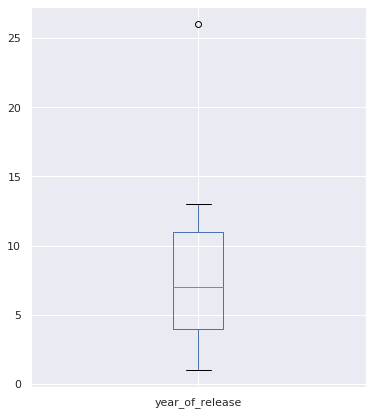

In [22]:
platforms_life = data_games[['platform', 'year_of_release']]
platforms_life = platforms_life.drop_duplicates().dropna().groupby(by='platform')['year_of_release'].count().reset_index()
platforms_life.boxplot(column=['year_of_release'], figsize=(6, 7))

В основном **жизненный цикл платформ составляет от 4 до 11 лет**. Медиана - 7 лет. Можно сделать вывод, что **характерный срок жизни одной платформы составляет 7 лет**. 


### Вывод

1. По суммарным продажам в течение всего периода лидирует платформа PS2, следом расположились платформы X360, PS3 и Wii и замыкает десятку лидеров платформа PC.
2. Все платформы имеют определенный жизненный цикл, в основном не более 10-11 лет. Исключением является платформа PC, она лидирует по продолжительности жизни с 1980 по 2016 годы. В основном жизненный цикл платформ составляет от 4 до 11 лет, можно сделать вывод, что характерный срок жизни одной платформы составляет 7 лет. 
3. Самые активные продажи обычно начинаются со второго года, после появления платформы и снижаются к 7-8 году. За все эти годы успешно лидируют платформы семейства PlayStation, а с 2006 года им составляют конкуренцию платформы X360 и Wii. 

### Определение потенциально прибыльных платформ

При изучении диаграммы распределения проданных игр по платформам мы видели, что в 2013 году появилась новая платформа PS4 взамен PS3. В то же время, с учетом средней продолжительности жизни платформ, мы видим, что на остальных платформах к этому времени начинают падать продажи, либо почти исчезают. Таким образом для того, чтобы построить прогноз на 2017 год, **актуальным для нас периодом будет с 2012 по 2016 годы**, то есть за последние 5 лет.

Посмотрим какие платформы лидируют по продажам начиная с 2012 года.

In [23]:
modern_data_games = data_games.query('year_of_release >= 2012')

In [24]:
modern_data_games.groupby(by='platform')['global_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: global_sales, dtype: float64

Всего в эти годы игры продавались на 11 платформах. **Абсолютным лидером является PS4 - 314 млн проданных копий игр**, на втором и третьем местах  расположились PS3 и X360 - 288 и 236 млн. соответственно. Также в пятерку лидеров входят платформы 3DS и XOne. **Замыкают список платформы с самыми низкими продажами: Wii, PSP и DS**. Как мы помним из диаграммы распределения проданных игр по платформам к 2012 - 2013 годам игры на платформах Wii, PSP и DS практически перестали продаваться. Поэтому для изучения динамики роста продаж игр по платформам оставим 8 платформ.  

In [25]:
top8_platforms_modern_time = modern_data_games.query('platform not in ("Wii", "PSP", "DS")').pivot_table(index='year_of_release', columns='platform', values='global_sales', aggfunc='sum')
top8_platforms_modern_time.style.set_caption('Топ 8 платформ по продажам игр в 2012 - 2016 годах')

platform,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne
year_of_release,,,,,,,,
2012,51.36,23.22,107.36,nan,16.19,17.56,99.74,nan
2013,56.57,12.38,113.25,25.99,10.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100,11.9,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.9,6.25,16.35,11.96,60.14
2016,15.14,5.25,3.6,69.25,4.25,4.6,1.52,26.15


Для того, чтобы изучить какие платформы растут, а какие падают в продажах построим диаграмму продажи игр по платформам начиная с 2012 года.

Text(0, 0.5, 'Количество проданных копий игр')

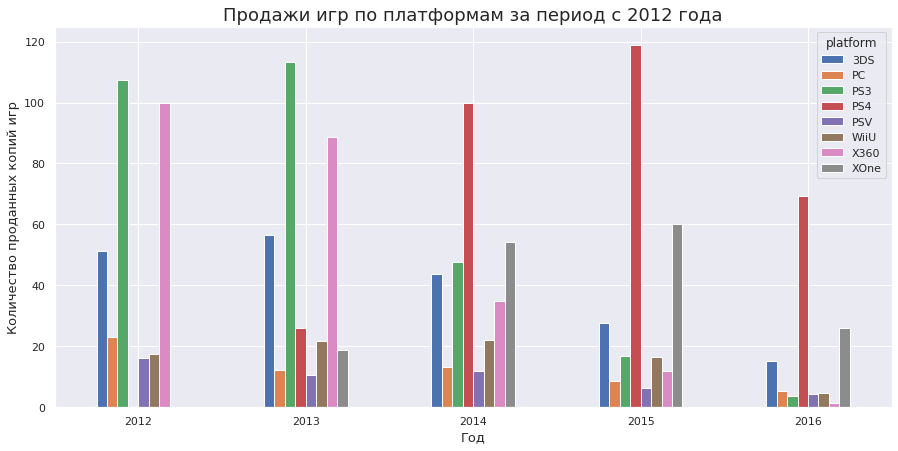

In [26]:
top8_platforms_modern_time.plot.bar(rot=0, figsize=(15, 7))
plt.title("Продажи игр по платформам за период с 2012 года", fontsize = 18)
plt.xlabel('Год', fontsize = 13)
plt.ylabel('Количество проданных копий игр', fontsize = 13)

1. Продажи игр на платформах PS3, X360, 3DS резко падают начиная с 2012 - 2013 годов. 
2. В 2015 - 2016 годах также наблюдается спад продаж игр на платформах WiiU, PSV и PC. 
3. А вот продажи игр на платформах PS4 и XOne растут с 2013 года. Хотя их рост и снизился в 2016 году, мы знаем, что данные за этот год неполные и нельзя полностью оценивать этот период. 
4. Очевидно, что PS4 и XOne пришли на смену старым версиям игровых консолей линеек PlayStation и Xbox в 2013 году и с учетом средней продолжительности жизни платформ - 7 лет, можно предположить, что они будут коммерчески активны до 2019 - 2020 годов.  
  
Таким образом **в 2017 году нужно делать ставку на потенциально прибыльные платформы PS4 и XOne**.  
  
Отдельно стоит отметить, что не нужно полностью списывать со счетов платформу PC. Несмотря на то, что в последние 2 года на ней наблюдается снижение продажи игр, эта платформа, вероятно, самая стабильная и продолжит свое существование еще долгие годы. Продажи игр на этой платформе не слишком прибыльны, однако мы наблюдали, что в некоторые годы она занимала 4-5 место по продажам игр. 

- **Изучим как распределились глобальные продажи игр по платформам**

Построим диаграмму размаха для глобальных продаж игр начиная с 2012 года.

<div class="alert alert-warning">
    
<b> Комментарий от ревьюера</b>
    
Все библиотеки лучше импортировать в начале файла. Об этом говорится в [стилевом гайде по питону](https://www.python.org/dev/peps/pep-0008/#imports)
    
    Imports are always put at the top of the file, just after any module comments and docstrings, and before module globals and constants.
</div>


<div class="alert alert-info">
      
Поставила импорт в начале файла.
</div>


(0, 2)

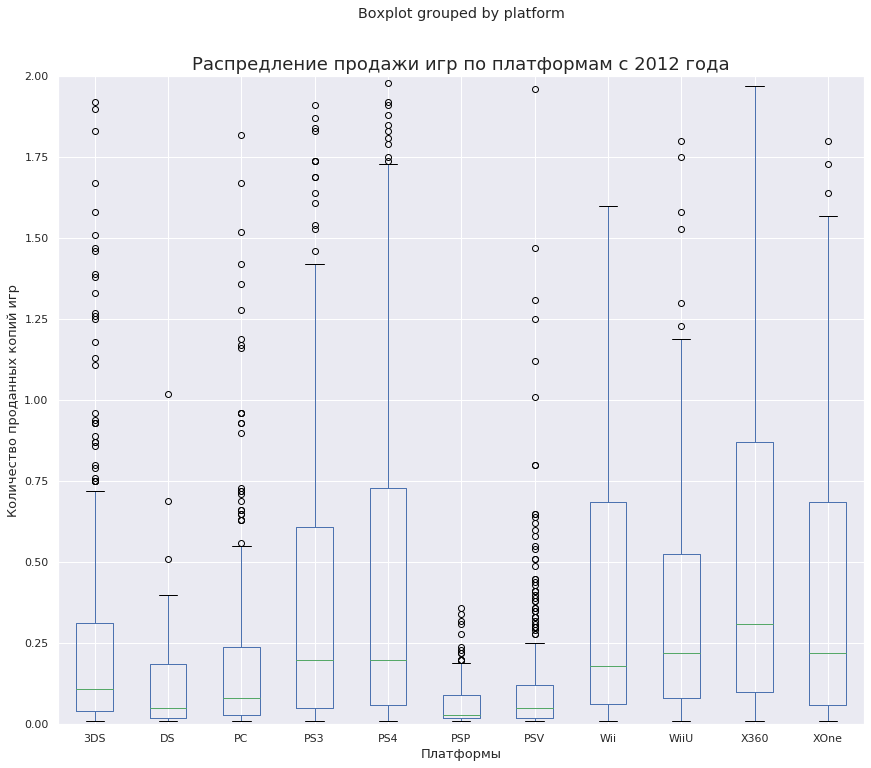

In [27]:
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
modern_data_games.boxplot('global_sales', by='platform', figsize=(14, 12))
plt.title("Распредление продажи игр по платформам с 2012 года", fontsize = 18)
plt.xlabel('Платформы', fontsize = 13)
plt.ylabel('Количество проданных копий игр', fontsize = 13)
plt.ylim(0, 2)

**В первую группу лидеров входят платформы X360, PS4, Wii, XOne, PS3 и WiiU**. В основном продажи на этих платформах составляли от 40 до 650-850 тысяч копий игр, медиана составляет от 180 до 300 тысяч копий. Продажи некоторых игр достигали 1,75 - 2 млн. копий. Таким образом в эту группу попали по 2 консоли линеек PlayStation, Xbox и Wii.     
**Вторую группу состравляют платформы 3DS, DS и PC**. Основная часть продаж лежит в диапазоне от 20 до 310 тысяч копий игр, медиана в районе 60 - 120 тысяч. Продажи отдельных игр достигали 600 - 700 тысяч копий.  
**Третью группу составлют портативные консоли линейки PlayStation - PSP и PSV**. 75% мировых продаж игр, выпущенных на этих консолях, не превышали 120 тысяч копий.

### Вывод

Проанализировав период с 2012 по 2016 годы, мы выявили следующее:
1. Всего игры представлены на 11 платформах. Абсолютным лидером по суммарным продажам игр является PS4, на втором и третьем местах расположились PS3 и XOne. Замыкают список платформы с самыми низкими суммарными продажами: Wii, PSP и DS. 

2. Наблюдается спад продаж игр на платформах PS3, X360, 3DS, WiiU, PSV и PC. А вот продажи игр на платформах PS4 и XOne растут с 2013 года. Платформы PS4 и XOne пришли на смену старым версиям игровых консолей линеек PlayStation и Xbox в 2013 году и можно предположить, что они будут коммерчески активны до 2019 - 2020 годов. Таким образом, в 2017 году нужно делать ставку на потенциально прибыльные платформы PS4 и XOne.

3. Самая стабильная платформа PC. Несмотря на то, что в последние 2 года на ней наблюдается снижение продажи игр, эта платформа, вероятно, продолжит свое существование еще долгие годы. Продажи игр на этой платформе не слишком прибыльны, однако в некоторые годы она занимала 4-5 место по продажам игр.

4. Характерное распределение продаж игр внутри платформ:
- в первую группу входят платформы X360, PS4, Wii, XOne, PS3 и WiiU. На этих платформах в основном продажи составили от 40 до 650-850 тысяч копий игр. Продажи некоторых игр достигали 1,75 - 2 млн. копий.
- вторую группу составляют платформы 3DS, DS и PC. Основная часть продаж лежит в диапазоне от 20 до 310 тысяч копий игр. Продажи отдельных игр достигали 600 - 700 тысяч копий.
- третью группу составляют портативные консоли линейки PlayStation - PSP и PSV. 75% мировых продаж игр, выпущенных на этих консолях не превышали 120 тысяч копий.

### Влияние отзывов на продажи игр внутри платформ

Одной из самых популярных является платформа PS4. Посмотрим как влияют отзывы критиков и пользователей на продажи внутри этой платформы. А затем сравним с выводами по продажам на других платформах.

In [28]:
# срез данных по платформе PS4 и остальным платформам
ps4_games = modern_data_games.query('platform == "PS4"')
other_platform_games = modern_data_games.query('platform != "PS4"')

-  **Влияние отзывов на продажи игр внутри платформы PS4**

Чтобы найти зависимость данных параметров построим матрицу корреляции.

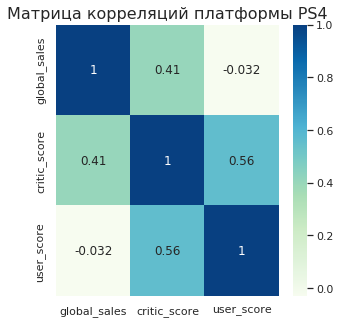

In [29]:
plt.figure(figsize=(5, 5))
plt.title('Матрица корреляций платформы PS4', fontsize = 16)
sns.heatmap(ps4_games[['global_sales','critic_score','user_score']].corr(), annot = True, fmt='.2g', cmap='GnBu')

Коэффициент корреляции между глобальными продажами и отзывами критиков составляет 0.41, есть небольшая прямая зависимость между оценкой критиков и продажами игр на платформе PS4. Иными словами **чем выше оценка критиков, тем выше продажи** .  
Коэффициент корреляции между глобальными продажами и отзывами пользователей составляет -0.032, зависимости практически не наблюдается. Таким образом, **оценки пользователей не влияют на  продажи игр на платформе PS4** .     
Вероятно покупатели все же больше ориентируются на мнение критиков при покупке игр.

Построим диаграмму рассеяния, что чтобы визуально отразить зависимость этих параметров.

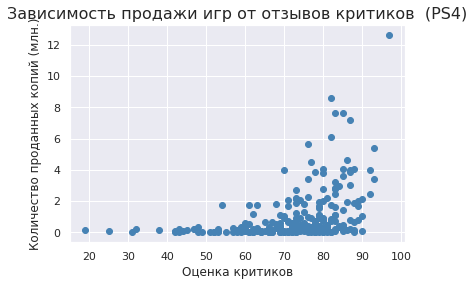

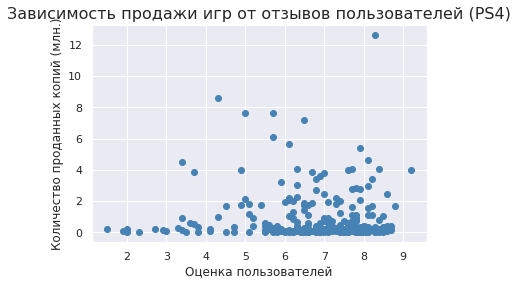

In [30]:
# определение цвета диаграммы
color_blue = 'steelblue'
# построение диграмм рассеяния для оценок пользователей и критиков (PS4)
plt.title("Зависимость продажи игр от отзывов критиков  (PS4)", fontsize = 16)
plt.xlabel('Оценка критиков', fontsize = 12)
plt.ylabel('Количество проданных копий (млн.)', fontsize = 12)
plt.scatter(ps4_games['critic_score'], ps4_games['global_sales'], marker='o', c=color_blue)
plt.show()
plt.scatter(ps4_games['user_score'], ps4_games['global_sales'], marker='o', c=color_blue)
plt.title("Зависимость продажи игр от отзывов пользователей (PS4)", fontsize = 16)
plt.xlabel('Оценка пользователей', fontsize = 12)
plt.ylabel('Количество проданных копий (млн.)', fontsize = 12)
plt.show()

На первой диаграмме прослеживается, что при оценке критиков 70 баллов и выше количество проданных копий игр может увеличиваться. На второй же диаграмме можно заметить, что разброс гораздо шире и оценки пользователей не влияют на продажи игр на платформе PS4.  

-  **Влияние отзывов на продажи игр внутри остальных платформ**

 Построим матрицу корреляций и сравним полученные результаты с выводами по продажам игр на других платформах.

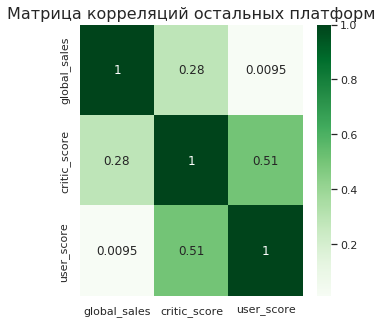

In [31]:
plt.figure(figsize=(5, 5))
plt.title('Матрица корреляций остальных платформ', fontsize = 16)
sns.heatmap(other_platform_games[['global_sales','critic_score','user_score']].corr(), annot = True, fmt='.2g', cmap='Greens')

**Здесь мы можем наблюдать такую же картину, как и с продажами внутри платформы PS4** .   
Коэффициент корреляции между глобальными продажами и отзывами критиков составляет 0.28, есть небольшая прямая зависимость между оценкой критиков и продажами игр на других платформах.  
Коэффициент корреляции между глобальными продажами и отзывами пользователей составляет 0.0095, зависимости практически не наблюдается.   
Таким образом можно сделать вывод, что **на продажи игр на других платформах имеют небольшое влияние оценки критиков и не влияют оценки пользователей**.

Построим также диаграмму рассеяния, что чтобы визуально оценить зависимость данных параметров.

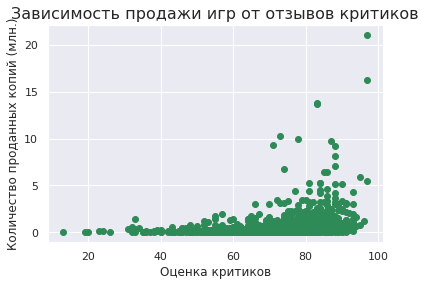

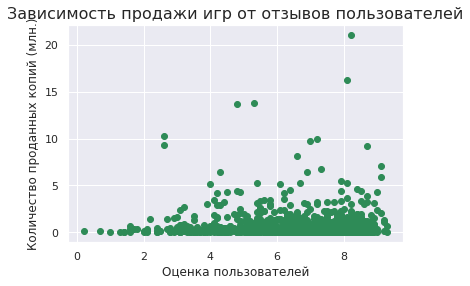

In [32]:
# определение цвета диаграммы
color_green = 'Seagreen'
# построение диграмм рассеяния для оценок пользователей и критиков
plt.scatter(other_platform_games['critic_score'], other_platform_games['global_sales'], marker='o', c=color_green)
plt.title("Зависимость продажи игр от отзывов критиков", fontsize = 16)
plt.xlabel('Оценка критиков', fontsize = 12)
plt.ylabel('Количество проданных копий (млн.)', fontsize = 12)
plt.show()
plt.scatter(other_platform_games['user_score'], other_platform_games['global_sales'], marker='o', c=color_green)
plt.title("Зависимость продажи игр от отзывов пользователей", fontsize = 16)
plt.xlabel('Оценка пользователей', fontsize = 12)
plt.ylabel('Количество проданных копий (млн.)', fontsize = 12)
plt.show()

На первой диаграмме также прослеживается, что при оценке критиков 70 баллов и выше количество проданных копий игр немного увеличивается. На второй диаграмме тоже аналогичная ситуация: разброс гораздо шире и оценки пользователей не влияют на продажи игр на других платформах.  

### Вывод

Обобщив выше сказанное, сделаем вывод, что на продажи игр, как на одной из самых популярных платформ, так и на остальных платформах имеют небольшое влияние оценки критиков. Игры с оценкой от 70 баллов и выше могут продаваться успешнее других.

### Анализ игр по жанрам

Посмотрим на общее распределение игр по жанрам. Выявим самые прибыльные жанры. Определим выделяются ли жанры с высокими и низкими продажами.

- **Распределение игр по жанрам**

Text(0.5, 1.0, 'Распределение игр по жанрам')

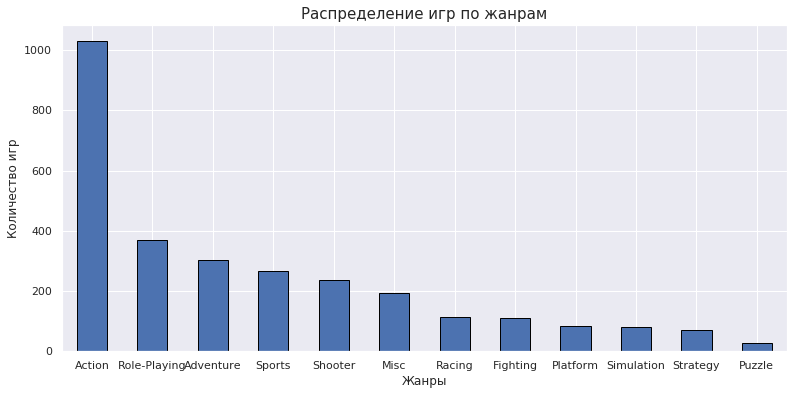

In [33]:
(
    modern_data_games['genre']
    .value_counts()
    .plot(kind='bar', figsize=(13, 6), rot=360, ec='black', legend=False)      
)
plt.xlabel('Жанры', fontsize = 12)
plt.ylabel('Количество игр', fontsize = 12)  
plt.title('Распределение игр по жанрам', fontsize = 15)

Всего на рынке представлено 12 жанров игр.  
**Лидером среди жанров является Action**, в этом жанре было выпущено более 1000 игр. Далее с большим отрывом следуют игры жанров: Role-Playing, Adventure, Spotrs, Shooter и Misc c количеством выпущенных игр от 380 до 200 игр в каждом жанре. **Меньше всего игр было выпущено в жанре Puzzle**, около 20-25. 

- **Жанры с высокими и низкими продажами игр**

Text(0.5, 1.0, 'Продажи игр')

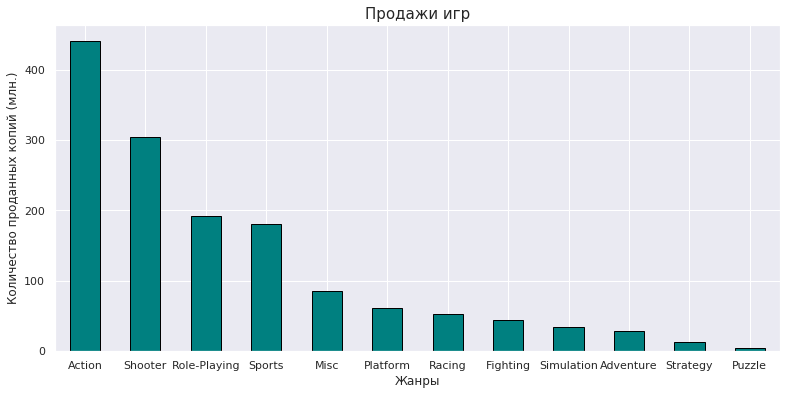

In [34]:
(
    modern_data_games.groupby(by='genre')['global_sales'].sum()
    .sort_values(ascending=False)
    .plot(kind='bar', figsize=(13, 6), rot=360, ec='black', legend=False, color='Teal')      
)
plt.xlabel('Жанры', fontsize = 12)
plt.ylabel('Количество проданных копий (млн.)', fontsize = 12)  
plt.title('Продажи игр', fontsize = 15)

**Лидером по продажам игр также является жанр Action**, суммарные продажи составляют около 500 млн. копий.  
**На втором месте следует жанр Shooter** с суммарными продажами 310 млн. копий игр.    
**В третью группу можно отнести игры жанров Role-Playing и Sports**, однако их продажи в 2,5 раза меньше, чем игр жанра Action - 190 - 180 млн. копий игр.  
**Наименее популярны игры жанров Strategy и Puzzle**, их продажи составляют от 10 до 20 млн. проданных игр. 

Теперь сравним медианные продажи игр по жанрам.

In [35]:
genre_names = modern_data_games['genre'].unique()
print('Медианные продажи жанров (в млн. копий игр):')
for name in genre_names:
    print(name, '-', modern_data_games.query('genre == @name')['global_sales'].median().round(2))

Медианные продажи жанров (в млн. копий игр):
Action - 0.12
Shooter - 0.44
Role-Playing - 0.14
Platform - 0.21
Misc - 0.12
Simulation - 0.12
Sports - 0.24
Fighting - 0.13
Racing - 0.14
Strategy - 0.08
Adventure - 0.03
Puzzle - 0.04


По медианным продажам лидируют жанры Shooter, Sports и Platform с медианными продажами - 440, 240 и 210 тысяч копий игр соответственно. Наименьшие медианные продажи у игр жанров Puzzle и Adventure - всего 40 - 30 тысяч копий.

### Вывод

1. Жанр Action очень популярный. В нем выпускается большое количество игр и в нем наибольшее количество проданных копий игр за период с 2012 по 2016 годы. Однако по медианным продажам он занимет всего шестую позицию. Иными словами лишь некоторые игры продаются очень успешно.
2. Жанр Shooter лидирует по медианным проджам, а это значит, что большинство игр в этом жанре продаются очень успешно.  
2. Потенциально прибыльными также остаются игры Role-Playing, Sports, Platform и Racing. В них выпускает достаточно большое количество игр и у них довольно высокие медианные продажи.
3. Несмотря на то, что в жанре Adventure выпускается довольно много игр, его нельзя назвать успешно продаваемым жанром. 
4. Меньше всего выпускается и продается игр в жанре Puzzle. 

## Портрет пользователя каждого региона (NA, EU, JP)

- **Самые популярные платформы (топ-5)**

Выведем топ-5 самых популярных платформ по продажам игр для каждого из регионов. Платформы, не вошедшие в пятерку самых популярных, будут объединены под названием "Other" (англ. - "Другие").

In [36]:
# функция создания топ-5 по регионам
def top_by_region(data, col1, col2,):
    data_region = data.groupby(by=col1)[col2].sum().sort_values(ascending=False)
    top5 = data_region.head(5)     
    dict_data_region = {}
    other = 0
    for index in data_region.index:
        if index in top5:
            dict_data_region[index] = data_region[index]
        else:
            other += data_region[index]
    dict_data_region['Other'] = other
    new_data_region = pd.Series(dict_data_region)
    return new_data_region

In [37]:
# создание топ-5 платформ по регионам
na_top5_platforms = top_by_region(modern_data_games, 'platform', 'na_sales')
eu_top5_platforms = top_by_region(modern_data_games, 'platform', 'eu_sales')
jp_top5_platforms = top_by_region(modern_data_games, 'platform', 'jp_sales')

Построим круговые диаграммы, чтобы увидеть какую долю продаж занимают игры на различных платформах в каждом регионе.

In [38]:
# функция построения круговых диаграмм из трех Series
def make_plot_pie(data_1, data_2, data_3, amount_expl):
    if amount_expl == 6:
        explode = (0.1, 0, 0, 0, 0, 0)
    else:
        explode = (0.1, 0, 0, 0, 0)

    fig = plt.figure(figsize=(21, 7))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)

    ax1.pie(data_1, labels=data_1.index, shadow=True, autopct='%1.0f%%', explode=explode)
    ax1.set_title('Северная Америка', fontsize = 15)
    ax2.pie(data_2, labels=data_2.index, shadow=True, autopct='%1.0f%%', explode=explode)
    ax2.set_title('Европа', fontsize = 15)
    ax3.pie(data_3, labels=data_3.index, shadow=True, autopct='%1.0f%%', explode=explode)
    ax3.set_title('Япония', fontsize = 15)
    plt.show()

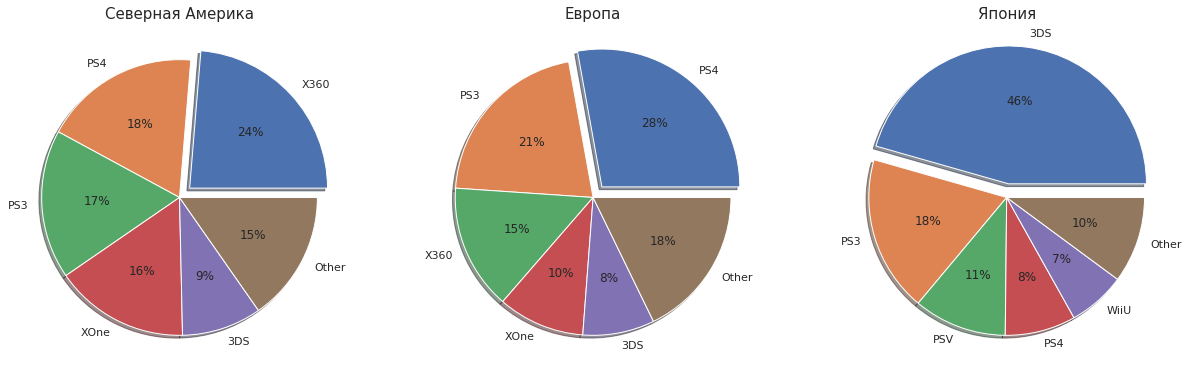

In [39]:
make_plot_pie(na_top5_platforms, eu_top5_platforms, jp_top5_platforms, 6)

- **Северная Америка:**  
В Северной Америке наиболее популярны игры на платформе X360, они занимают самую большую долю продаж- 24%. Вероятно потому, что консоли Xbox выпускает американская компания Microsoft и пользователям предпочитают отечественные технологии. Хотя и игры на XOne занимают только четвертую позицию, доля продаж игр на этой платформе всего на 1-2% ниже, чем на платформах PlayStation. Это также может быть связано с тем, что XOne появилась только в 2013 году и сейчас еще набирает популярность.   
Вторыми по популярности идут игры на консолях линейки PlayStation: PS4 - 18% и PS3 - 17%. Таким образом они занимают 35% рынка.  
Менее популярны оказались игры на портативной игровой консоли 3DS - всего 9% игрового рынка.     
 
   
- **Европа:**  
В Европе наиболее популярны игры на консолях PlayStation: PS4 - 28% и PS3 - 21% от общих продаж игр в Европе. Они занимают 49% игрового рынка. Очевидно, что пользователи в Европе предпочитают игры на консолях PlayStation.   
Следом идут игры на консолях линейки Xbox: X360 - 15% и XOne - 10%. Общая доля продаж игр на этих консолях составляет 25%.  
Также, как и в Северной Америке менее популярны игры на платформе 3DS - 8%.    
  
    
- **Япония:**  
В Японии картина резко отличает. Самую большую доля продаж занимают игры на портативной игровой консоли 3DS - 46%, это почти половина рынка всех игр в Японии. Также можно заметить, что в Японии популярны игры и на другой портативной консоли PSV - объем продаж 11%. Таким образом популярные портативные консоли занимают 57% рынка в Японии.    
Популярные игровые консоли занимают 33% рынка в Японии. Сюда вошли игры на консолях PlayStation: PS3 - 18% и PS4 - 8% и игры на консолях WiiU - 7% игрового рынка.  
Отличительной особенностью является то, что пользователи в Японии, как минимум на 90%, предпочитают игры на платформах отечественных производителей - компаний Sony и Nintendo.  

- **Самые популярные жанры (топ-5)**

Определим топ-5 самых популярных жанров игр для каждого из регионов. Жанры, не вошедшие в пятерку самых популярных, будут объединены под названием "Other" (англ. - "Другие").

In [40]:
# создание топ-5 жанров по регионам
na_top5_genres = top_by_region(modern_data_games, 'genre', 'na_sales')
eu_top5_genres = top_by_region(modern_data_games, 'genre', 'eu_sales')
jp_top5_genres = top_by_region(modern_data_games, 'genre', 'jp_sales')

Построим круговые диаграммы, чтобы увидеть какую долю продаж занимают игры разных жанров в каждом регионе.

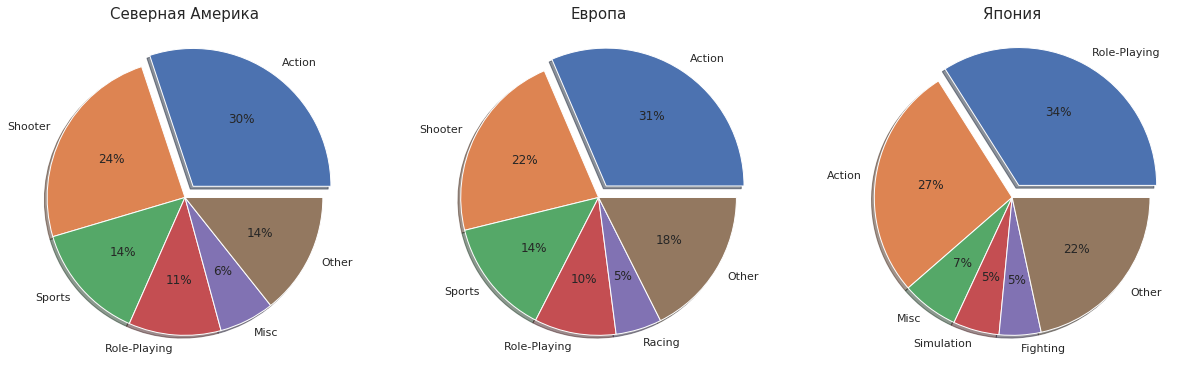

In [41]:
make_plot_pie(na_top5_genres, eu_top5_genres, jp_top5_genres, 6)

- **Северная Америка и Европа:**  
Предпочтения пользователей в Северной Америке и Европе во многом схожи. Самыми любимым жанром являются жанр Action, который занимает 30-31% от общих продаж. На втором месте по популярности следуют игры жанра Shooter с долей продаж от 22% до 24% рынка. Третью группу составляют игры жанров Sports и Role-Playing, которые в целом занимают 24-25% от продаж всех игр в этих регионах. А вот на пятом месте по полярности в Северной Америке находятся игры жанра Misc - 6%, в то время как в Европе это игры жанра Racing - 5% от объема продаж.       
 
       
- **Япония:**  
Предпочтения пользователей в Японии отличаются. Самыми популярными играми в Японии являются игры жанра Role-Playing - 34% от рынка продаж. Жанр Action также очень популярен в Японии, он занимает второе место по количеству продаж 27%. Таким образом он занимает даже большую долю рынка, чем в других регионах. Третью группу составляют игры жанров Misc - 7% от продаж, Simulation и Fighting по 5% от всех продаж в Японии. Здесь стоит обратить внимание, что жанры Simulation и Fighting не так популярны в других регионах, как в Японии. А вот популярные в Северной Америке и Европе жанры Shooter и Sports напротив не популярны в Японии.

- **Влияние рейтинг ESRB на продажи в отдельном регионе**

Узнаем влияет ли рейтинг ESRB на продажи в отдельном регионе. Построим круговые диаграммы, чтобы узнать какие доли продаж занимают игры разных рейтингов для каждого региона.

Описание рейтингов ESRB:  
- E (Everyone) — Для всех
- E10+ (Everyone 10 and older) — Для всех старше 10 лет
- T (Teen) — Подросткам 13—19 лет
- M (Mature) — От 17 лет

In [42]:
na_esrb = modern_data_games.groupby(by='rating')['na_sales'].sum().sort_values(ascending=False)
eu_esrb = modern_data_games.groupby(by='rating')['eu_sales'].sum().sort_values(ascending=False)
jp_esrb = modern_data_games.groupby(by='rating')['jp_sales'].sum().sort_values(ascending=False)

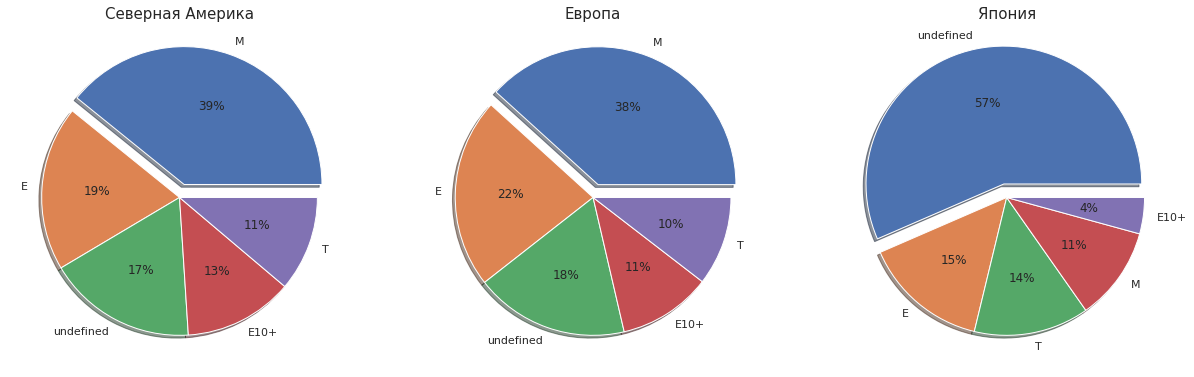

In [43]:
make_plot_pie(na_esrb, eu_esrb, jp_esrb, 5)

- **Северная Америка и Европа:**  
В Северной Америке и Европе наиболее популярны игры с рейтингом М - 38-39% продаж. Второе место занимают игры с рейтингом "Для всех возрастов" - 19-22%, игры без возрастного рейтинга занимают 17-18% от объема продаж, а в последнюю группу по популярности входят игры с рейтингами Е10+ и Т, то есть для пользователей от 10 до 19 лет, с объемом продаж от 10% до 13%.          
 
       
- **Япония:**  
Предпочтения пользователей в Японии как всегда отличаются. Игры без рейтинга ESRB в Японии занимают 57% продаж на игровом рынка. Также Японии пользователи чаще всего играют в игры с рейтингом E и Т, эти игры имеют общую долю продаж в 29% от всего игрового рынка. Чуть менее популярны игры с рейтингом "Для лиц старше 17 лет" - 11% и рейтингом Е10+ - всего 4% продаж на рынке игр в Японии.  

### Вывод

Обобщив всё выше сказанное, можно составить типичный портрет для пользователей каждого из регионов.  
  
- **Северная Америка:**  
В Северной Америке самыми популярными остаются игры, которые выходят на консолях линейки Xbox, чуть менее, но также довольно популярны игры на консолях линейки PlayStation. Пользователи любят играть в игры жанров Action и Shooter, которые по объемам продаж занимают более половины рынка игровой индустрии в Северной Америке. Чуть менее популярны игры жанров Sports и Role-Playing и в целом занимают более трети от продажи всех игр. 
Пользователи предпочитает игры с рейтингом М, вероятно это и есть игры в популярных жанрах Action и Shooter. 36% пользователей играют в игры с рейтингом "Для всех возрастов" и без рейтинга ESRB.  
  
- **Европа:**  
В Европе наиболее популярны игры на консолях PlayStation, игры на консолях PS4 и PS3 занимают 49% от общего объема продаж игр в Европе. Четверть пользователей играют в игры, выпущенные на консолях X360 и XOne. Также, как и в Северной Америке, в Европе любят игры жанров Action и Shooter, многие пользователи также играют в игры жанров Sports и Role-Playing. Однако вместо игр жанра Misc в Европе это предпочитают жанр Racing, хотя игры данного жанра составляют только - 5% от объема продаж. Предпочтения по рейтингам игр в Европе практически ничем не отличаются от предпочтений пользователей Северной Америки.     
  
    
- **Япония:**  
Чтобы удовлетворить спрос пользователей в Японии нужно делать ставку на игры, выпускаемые на портативных игровых консолях, они занимают 57% рынка в Японии. Игры же выходящие на игровых консолях занимают 33% рынка в Японии. Однако отличительной особенностью является то, что пользователи в Японии, как минимум на 90%, предпочитают игры на платформах отечественных производителей - компаний Sony и Nintendo. Самыми популярными играми в Японии являются игры жанра Role-Playing и Action, вместе они занимают более 60% игрового рынка. Довольно популярны игры жанров Misc, Simulation и Fighting - 17% от всех продаж в Японии. Более половины пользователей в Японии играют в игры без рейтинга ESRB. Таким образом рейтинг ESRB не имеет такое сильное влияние на продажи игр в Японии.  
  
В целом можно сказать, что предпочтения пользователей компьютерных игр в Северной Америке и Европе очень схожи, в то время как в Японии сильно отличаются. 

## Статистический анализ данных

- **Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сформулируем нулевую и альтернативную гипотезы. Так как за нулевую гипотезу мы возьмем утверждение, что средние пользовательские рейтинги платформ Xbox One и PC равны, то альтернативный гипотезой будет наоборот утверждение, что средние пользовательские рейтинги этих платформ не равны:  
  
**H0** - средние пользовательские рейтинги платформ Xbox One и PC равны   
**H1** - средние пользовательские рейтинги платформ Xbox One и PC различаются

Критический уровень статистической значимости примем равным 5%:  
  
alpha = 0.05

In [44]:
xone_data = modern_data_games.query('platform == "XOne"')['user_score'].dropna()
pc_data = modern_data_games.query('platform == "PC"')['user_score'].dropna()

Посмотрим на дисперсию двух выборок:

In [45]:
np.var(xone_data)

1.8965188383045526

In [46]:
np.var(pc_data)

2.7569952398906588

Для того, чтобы проверить гипотезу о равенстве средних двух генеральных совокупностей по выборке используем метод *scipy.stats.ttest_ind* с параметром *equal_var = False*, потому что дисперсии двух выборок значительно отличаются.

In [47]:
# ttest
alpha = 0.05  

results = st.ttest_ind(xone_data, pc_data, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


**Нельзя утверждать, что средний пользовательский рейтинг игр на платформе Xbox One отличается от среднего пользовательского рейтинга игр на платформе РС**, так как вероятность ошибки в данном случае 54%.

Для сравнения посмотрим на средние величины этих выборок.

In [48]:
# статистическое описание платформа XOne
xone_data.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [49]:
# статистическое описание платформа PC 
pc_data.describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

Действительно средние пользовательские рейтинги практически не отличаются на этих платформах. 

- **Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные**

Сформулируем нулевую и альтернативную гипотезы. Так как за нулевую гипотезу мы возьмем утверждение, что средние пользовательские рейтинги жанров Action и Sports равны, то альтернативный гипотезой будет наоборот утверждение, что средние пользовательские рейтинги жанра Action отличаются от средних пользовательских рейтингов жанра Sports:  
  
**H0** - средние пользовательские рейтинги жанров Action и Sports равны  
**H1** - средние пользовательские рейтинги жанров Action и Sports отличаются

Критический уровень статистической значимости примем равным 5%:  
  
alpha = 0.05

In [50]:
action_data = modern_data_games.query('genre == "Action"')['user_score'].dropna()
sports_data = modern_data_games.query('genre == "Sports"')['user_score'].dropna()

Посмотрим на дисперсию двух выборок:

In [51]:
np.var(action_data)

1.8854720340439224

In [52]:
np.var(sports_data)

3.0073882971729127

Для того, чтобы проверить гипотезу о равенстве средних двух генеральных совокупностей по выборкам используем метод *scipy.stats.ttest_ind* с параметром *equal_var = False*, потому что дисперсии двух выборок отличаются.

In [53]:
# ttest
alpha = 0.05  

results = st.ttest_ind(action_data, sports_data, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


Мы видим, что уровень р-значения очень низкий, гораздо ниже 5%, а значит вероятность того, что средние пользовательские рейтинги жанров Action и Sports равны крайне мала. Можно смело утверждать, что **средние пользовательские рейтинги жанров Action и Sports различаются**.

Сравним средние двух выборок, чтобы оценить на сколько отличаются средние пользовательские рейтинги жанров Action и Sports.

In [54]:
action_data.describe()

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [55]:
sports_data.describe()

count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

Средние пользовательские оценки игр в жанре Action действительно немного выше средних оценок игр в жанре Sports.

### Вывод

1. Нельзя утверждать, что средний пользовательский рейтинг игр на платформе Xbox One отличается от среднего пользовательского рейтинга игр на платформе РС.
2. Средние пользовательские рейтинги жанров Action и Sports различаются. 
3. Средние пользовательские оценки игр в жанре Action в выборках действительно немного выше средних оценок игр в жанре Sports.

## Общий вывод

**Мы провели анализ продажи компьютерных игр. Обобщим результаты проведенного анализа:**
1. В 2012 году наблюдался резкий спад количества выпускаемых компьютерных игр и в последние 4 года ситуация практически не меняется.
2. Мы высянили, что все платформы имеют определенный жизненный цикл, в основном не более 10-11 лет. Исключением является платформа PC, она лидирует по продолжительности жизни с 1980 по 2016 годы. Характерный срок жизни одной платформы составляет 7 лет. 
3. Мы опеределили потенциально прибыльные платформы и выяснили, что:
- абсолютным лидером по суммарным продажам игр является PS4, на втором и третьем местах расположились PS3 и XOne.
- платформы PS3, X360, 3DS, WiiU и PSV к 2016 году практически полностью исчерпали свой потенциал. 
- в 2017 году нужно делать ставку на потенциально прибыльные платформы PS4 и XOne, продажи игр на них растут с 2013 года.
5. Не стоит ориентироваться на оценки пользователей. Оценки критиков имеют большее влияние, игры с оценкой от 70 баллов и выше могут продаваться успешнее других.
6. Самые популярные жанры Action и Shooter. В них выпускается большое количество игр. Однако в жанре Action лишь некоторые игры имеют огромный успех по продажам. А вот в жанре Shooter большинство игр продаются очень успешно.
7. Потенциально прибыльными также остаются игры Role-Playing, Sports, Platform и Racing. В них выпускает достаточно большое количество игр и у них довольно высокие медианные продажи. 
8. Предпочтения пользователей компьютерных игр в Северной Америке и Европе очень схожи, в то время как в Японии сильно отличаются. 
9. В Северной Америке самыми популярными остаются игры, которые выходят на консолях линейки Xbox. Пользователи любят играть в игры жанров Action и Shooter, которые по объемам продаж занимают более половины рынка игровой индустрии в Северной Америке. Пользователи предпочитает игры с рейтингом "Для лиц старше 17 лет", а треть пользователей играют в игры с рейтингом "Для всех возрастов" и без рейтинга ESRB.   
10. В Европе наиболее популярны игры на консолях PlayStation, они занимают 49% от общего объема продаж игр в Европе. Предпочтения по жанрам и рейтингам игр в Европе практически ничем не отличаются от предпочтений пользователей Северной Америки.
11. В Японии пользователи предпочитают игры, выпускаемые на портативных игровых консолях, таких как 3DS и PSV. Эти игры занимают более половины рынка в Японии. Игры же выходящие на игровых консолях занимают только треть рынка в Японии. Самыми популярными играми в Японии являются игры жанра Role-Playing и Action, вместе они занимают более 60% игрового рынка. Рейтинг ESRB не имеет такое сильное влияние на продажи игр в Японии, так как более половины пользователей играют в игры без рейтинга ESRB. 

Таким образом для того, чтобы стать потенциально успешной, игра должна обладать следующими характеристиками:
- она должна выпускаться на платформах PS4 и XOne для пользователей в Северной Америке и Европе, для пользователей в Японии - в первую очередь на портативных игровых консолях, а также на консолях линейки PlayStation или консолях компании Nintendo;
- игра должна быть в жанрах Action и Shooter для пользователей в Северной Америке и Европе, и в жанрах Role-Playing или Action для пользователей в Японии;
- оценка критиков должна быть от 70 баллов и выше;
- игры должны обладать рейтингом ESRB "Для лиц старше 17 лет" в Европе и Северной Америке, Японии отлично продаются игры без рейтинга ESRB и игры имеющие рейтинг ESRB "Для всех возрастов" и "Для лиц от 13 до 19 лет".     
  
Полученные выводы можно использовать при планировании рекламных компаний в 2017 году.